In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf
import mplfinance as mpf
import seaborn as sns


### Making code to generate plots showing historical price avg grouped by sector/industry

In [4]:
group = 'Sector' #or industry, easiest to just make one variable that needs to be changed
FILENAME = 'history.csv' #just change it to whatever the file is
data  = pd.read_csv(FILENAME).drop('Unnamed: 0', axis=1)
data.dropna(inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'history.csv'

In [ ]:

tickers = [
    "AAPL",  # Apple
    "MSFT",  # Microsoft
    "GOOGL", # Alphabet (Google)
    "AMZN",  # Amazon
    "TSLA",  # Tesla
    "META",  # Meta (formerly Facebook)
    "NVDA",  # NVIDIA
    "BABA",  # Alibaba
    "SPY",   # S&P 500 ETF
    "V",     # Visa
]
 

data_list = []

for ticker in tickers:
    stock = yf.Ticker(ticker)
    hist = stock.history(period="5y")  
    hist["Ticker"] = ticker  
    stock_info = stock.info

    hist['Sector'] = stock_info.get('sector', 'None')
    hist['Industry'] = stock_info.get('industry', 'None')
    data_list.append(hist)

df = pd.concat(data_list)
df.reset_index(inplace=True)
df

Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)


$AAPL: possibly delisted; no price data found  (period=5y)
429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AAPL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AAPL&crumb=Edge%3A+Too+Many+Requests


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
grouped_data = df[['Date', 'Close', group]].groupby(['Date', group]).mean()
grouped_data.reset_index(inplace=True)

In [ ]:
fig = px.line(grouped_data, x='Date', y='Close', color=group, 
              title = f'Historical adjusted close price of stocks, grouped by {group}',
              labels = {
                  'date' : 'Date',
                  'close' : 'Closing price (adjusted)'
                })
fig

[*********************100%***********************]  5 of 5 completed


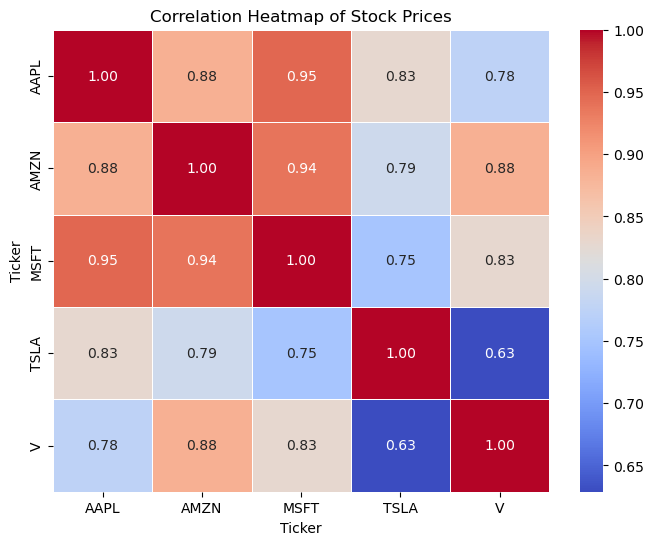

In [ ]:


# Download stock data for multiple stocks
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN','V']
stock_data = yf.download(tickers, start='2023-01-01', end='2024-01-01')['Close']

# Calculate correlations
correlation = stock_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Prices")
plt.show()

Shows us which stocks tend to move together, and how someone can diversify their portfolio if they pick stocks with 0 or negative correlations. 